<font color='black' size='4' face='Tenor Sans'>

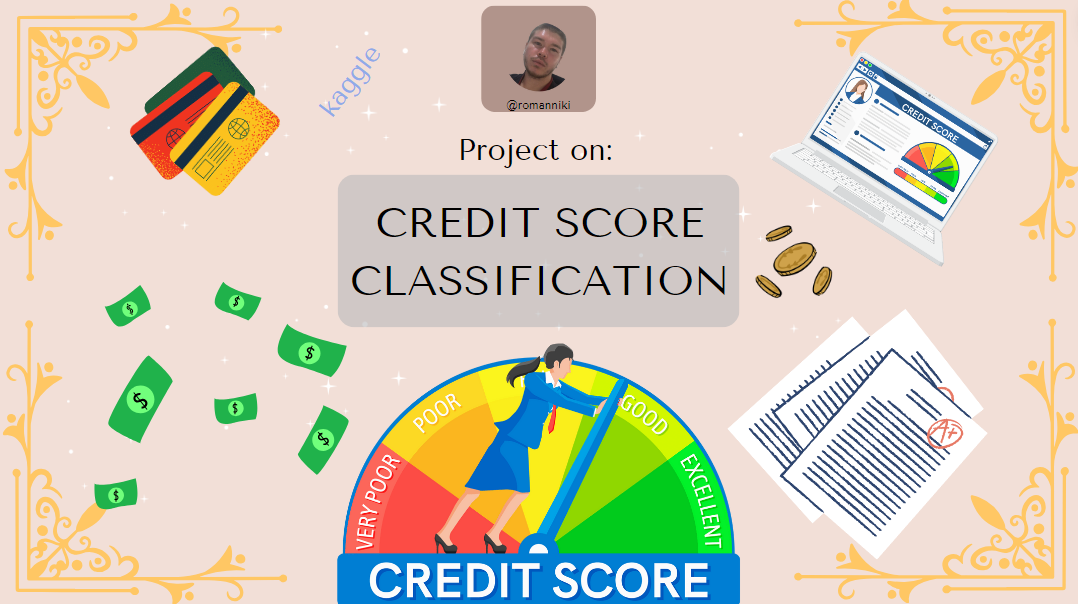

1. ❗ [About Dataset](#about-dataset)  

2. 🚩 [Preparation](#preparation)  
   2.1 📔 [Import Libraries](#import-libraries)  
   2.2 🗃️ [Loading Files](#loading-files)  
   
3. 🧹 [Data Cleaning](#data-cleaning)  
   3.1 📚 [Adjust Data Format (+Entry)](#adjust-data-format)  
   3.2 👥 [Duplicates](#duplicates)  
   3.3 ⚖️ [Data Scaling](#data-scaling)  
   3.4 👾 [Data Entry Plus](#data-entry-plus)  
   3.4.1 🗑️ [Filtering Trash](#filtering-trash)  
   3.4.2 ➖ [Negative Values](#negative-values)  
   3.4.2 🚮 [Dropping Columns](#dropping-columns)  
   3.5 🕵️ [Missing Values](#missing-values) 
   
4. 🎚️ [Feature Engineering](#feature-engineering)  
   4.1 🔢 [Scaling 2.0](#scaling-2.0)  
   4.2 🧬 [Encoding](#encoding)  
   4.2.1 🏷️ [Label Encoder](#label-encoder)  
   4.2.2 🔖 [Ordinal Encoder](#ordinal-encoder)    
   4.3 ⚙️ [New Features](#new-features)  
   4.4 💯 [Mutual Information Score (MI Score)](#mutual-information-score)  
   
5. 📊 [EDA](#eda)  
   5.1 📊 [Correlation Matrix](#correlation-matrix) 
   
6. 🧩 [Model](#model)   
   6.0.1 🏗️ [Building Model](#building-model)  
   6.1 🧜‍♀️ [MSE Models Fashion Show](#mse-models)  
   6.1.1 🌲 [RandomForestRegressor](#randomforestregressor)    
   6.1.1.1 ✨ [Model Validation (MSE)](#validation)  
   6.1.1.2 🎌 [Baseline VS MSE](#baseline-vs-mse)    
   6.1.1.3 📏 [Underfitting and Overfitting](#underfitting-and-overfitting)    
   6.1.2 🚀 [XGBoost](#xgboost)    
   6.1.3 📉 [Comparing MSE](#comparing-mse)    
   6.2 👌 [Accuracy Brand Reviews](#accuracy-reviews)  
   6.2.1 🔄 [SMOTE VS 🌳 RandomForestClassifier](#smote)    
   6.2.2 🎖️ [Accuracy test](#accuracy-test)  
   
7. ✅ [Conclusion](#conclusion)    
   7.1 🔐 [KEY POINTS](#KEY-POINTS)  
   7.2 ☝️ [TIPS](#TIPS)  
   7.3 ✍️ [Personal Experience Credit Score](#pexperience)  
   7.4 🛞 [Evaluations on building Data Models](#building-DM)  

## 1.❗About Dataset
<a id="about-dataset"></a>

    Problem Statement
    You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

    Task
    Given a person’s credit-related information, build a machine learning model that can classify the credit score.

<font color='black' size='2' face='Tenor Sans'>

<a id="preparation"></a>
## 2. 🚩 Preparation

<a id="import-libraries"></a>
## 2.1 📔 Import Libraries

In [16]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<a id="loading-files"></a>
## 2.2 🗃️ Loading Files
<font color='black' size='2' face='Sans Serif'>

In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
train = pd.read_csv('./input/train.csv', dtype={'Column26': str})
train.head(1)

/tmp/ipykernel_6275/942384703.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./input/train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


<a id="data-cleaning"></a>
## 3.🧹 Data Cleaning

In [19]:
# Looks like a lot of data not in the right format. Let's fix it!

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

    There are a lot of missplaced symbols not related to data which will affect training model. Let's do some magic to adjust form

<a id="adjust-data-format"></a>
## 3.1 📚 Adjust Data Format (+ Entry)

    Age / Loans / Delayed Payments


In [20]:
# That's a tricky one. I loop with extending code, so it solve Data Entry and Data Format issues at once. 

train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

    Annual Income

In [21]:
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

    Credit Limit

In [22]:
# Each column has it's own 'thing', which keep showing me errors. So I will step by step get rid of mistakes until achieving appropriate conditions

train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

    Outstanding Debt

In [23]:
# As the previous one, here I am dealing with non-numeric values. Conver them into float, ignoring errors. And replacing NaN values with 0

train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

    Invested Monthly

In [24]:
# Same but handling more errors

train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

    Monthly Balance

In [25]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

    Credit History Age

In [26]:
# Covert Credit History Age into Months for better model construction

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  

train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

<a id="duplicates"></a>
## 3.2 👥 Dublicates

In [27]:
duplicates = train[train.duplicated()]
num_duplicates = duplicates.shape[0]

if num_duplicates == 0:
    print("There are no duplicates 👌")
else:
    print("There are", num_duplicates, "duplicates.")

There are no duplicates 👌


## 3.3 ⚖️ Data Scaling
<a id="data-scaling"></a>


In [28]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


In [29]:
# Removing rediculous top outliers (2%)

selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

In [30]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85806.0,120.486003,690.067511,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,85806.0,49378.620726,36478.390299,7005.930000,19294.460000,36780.030000,70825.760000,166837.640000
Monthly_Inhand_Salary,72894.0,4105.781241,3036.319177,303.645417,1623.778333,3069.091667,5899.970000,14131.123333
Num_Bank_Accounts,85806.0,5.372759,2.585031,-1.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,85806.0,5.779048,5.727016,0.000000,4.000000,5.000000,7.000000,171.000000
Interest_Rate,85806.0,14.551174,8.824173,1.000000,7.000000,13.000000,20.000000,128.000000
Num_of_Loan,85806.0,7.318381,18.881665,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,85806.0,21.033483,14.786223,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,85806.0,12.348321,6.845002,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,85806.0,10.189597,6.867078,-6.490000,4.990000,9.280000,14.710000,36.970000


    That looks quite pretty ✅

<a id="data-entry"></a>
## 3.4 👾 Data Entry Plus

## 3.4.1 🗑️ Filtering trash
<a id="filtering-trash"></a>

In [31]:
train = train[train['Payment_Behaviour'] != '!@9#%8']

In [32]:
# Drop the rows containing the value '_______' in the 'Occupation' column

train = train[train['Occupation'] != '_______']
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [33]:
# Drop rows where 'Credit_Mix' is '_'

train = train[train['Credit_Mix'] != '_']
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


### 3.4.2 ➖ Negative Values
<a id="negative-values"></a>


In [34]:
# Negative values

selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    train = train[train[column] >= 0]

## 3.4.2 🚮 Dropping Columns
<a id="dropping-columns"></a>

In [35]:
# Not useful for trainig model

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

train.drop(columns=columns_to_drop, inplace=True)

<a id="missing-values"></a>
## 3.5 🕵️ Missing Values

In [36]:
total_missing_values = train.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values 💅")
else:
    print("Total missing values:", total_missing_values)

There are no missing values 💅


## 4.0 🎚️ Feature Engineering
<a id="feature-engineering"></a>

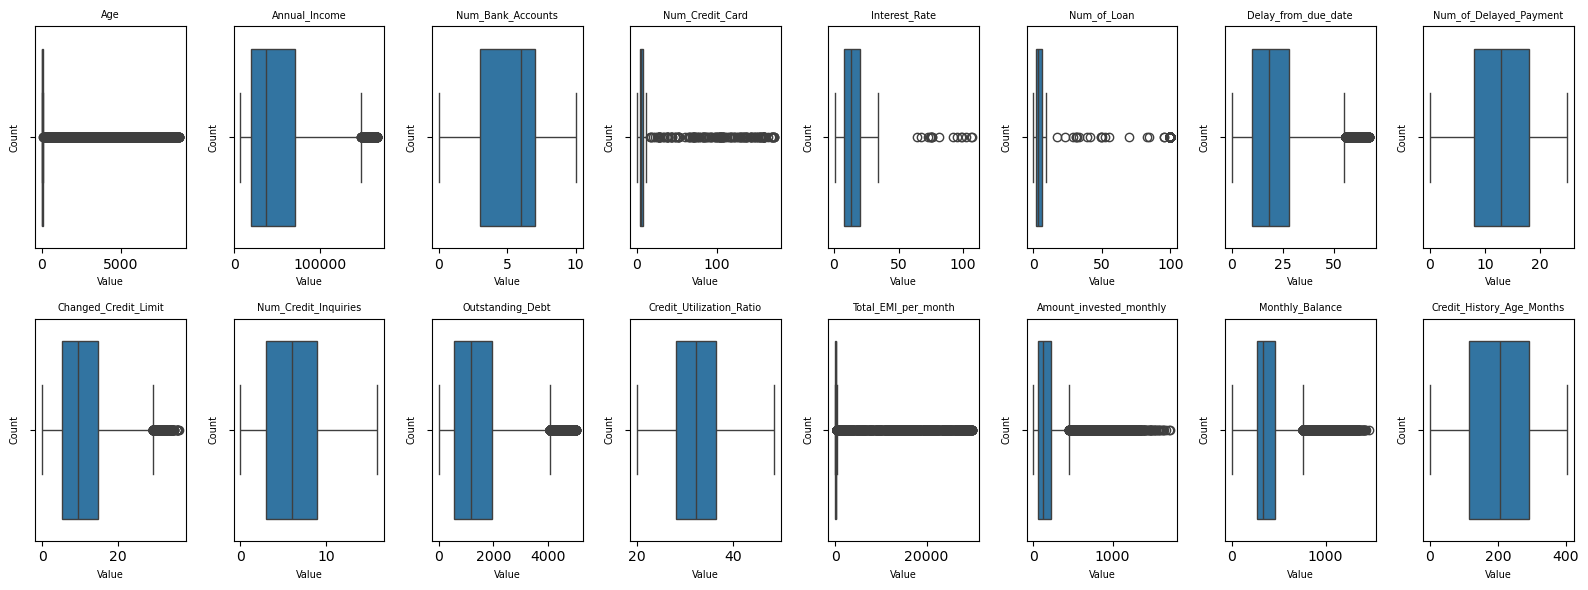

In [37]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## 4.1 🔢 Scaling 2.0
<a id="scaling-2.0"></a>


In [38]:
# Another step to tune best scale (subjective)

train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

    KEY 🗝️
    ______________________________________________________________________
    
    Decision was made while making EDA. I looked at the plots and realized, that some outliers are way beyond Standard deviation. The challenge is to choose the right scaling for modeling.
    
    ______________________________________________________________________

## 4.2 🧬 Encoding
<a id="encoding"></a>


## 4.2.1 🏷️ Label Encoder
<a id="label-encoder"></a>

In [39]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

In [40]:
# Encoding Occupation

label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

## 4.2.2 🔖 Ordinal Encoder
<a id="ordinal-encoder"></a>


In [41]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

In [42]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])

### Dropping Unencoded columns


In [43]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

## 4.3 ⚙️ New Features
<a id="new-features"></a>


    It might help to increase % of accuracy and reduce amount of errors. 

In [44]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)

train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Calculate the total outstanding debt per account

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Calculate the total number of delayed payments per account

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments) 

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']


## 4.4 💯 Mutual Information Score (MI Score)
<a id="mutual-information-score"></a>


    MI Score is a treasure! It will help you to recognize the most valuable variables for the prediction. Cool, right? 

In [45]:
categorical_columns = train.select_dtypes(include=['object']).columns

data_encoded = train.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.016529778473490797
Feature 'Annual_Income': Mutual Information Score = 0.42897531039482084
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.06225822821923788
Feature 'Num_Credit_Card': Mutual Information Score = 0.0687650956365351
Feature 'Interest_Rate': Mutual Information Score = 0.1004083671149727
Feature 'Num_of_Loan': Mutual Information Score = 0.010360022944691405
Feature 'Delay_from_due_date': Mutual Information Score = 0.07177701359184718
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.051816294213881564
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10625669528825821
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.02783535336730858
Feature 'Outstanding_Debt': Mutual Information Score = 0.4315687572042388
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07386900960861564
Feature 'Total_EM

In [46]:
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'  

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Annual Income: With a high Mutual Information Score of 0.430, the annual income appears to be a significant predictor of credit score rate. Generally, individuals with higher annual incomes tend to have better credit scores.

    Outstanding Debt: Another crucial factor is outstanding debt, which has a Mutual Information Score of 0.429. High levels of outstanding debt may negatively impact credit score rates.

    Debt-to-Income Ratio: This feature also demonstrates a high importance with a Mutual Information Score of 0.433. It measures the proportion of a person's debt relative to their income and is a strong indicator of creditworthiness.

    Total EMI per Month: Total Equated Monthly Installment (EMI) obligations carry a substantial weight (Mutual Information Score of 0.349) in predicting credit score rates. Higher EMI commitments might suggest higher financial stress and impact credit scores negatively.

    Interest Rate: While not as high as the debt-related features, the interest rate still holds significant importance with a Mutual Information Score of 0.100. Higher interest rates may indicate riskier borrowing behavior and could negatively influence credit scores.  
    
    ______________________________________________________________________

    ✂️ Dropping low related values for MI Score



In [47]:
# Getting rid of columns which are not important for prediction. Even so we just created new features, some of them seems to be not effective for the model
# I tried to get rid of other columns. However, the prediction accuracy was harmed by that. 

columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
train.drop(columns=columns_to_drop, inplace=True)

<a id="eda"></a>
## 5. 📊 EDA

## 5.1 🧱 Correlation Matrix
<a id="correlation-matrix"></a>


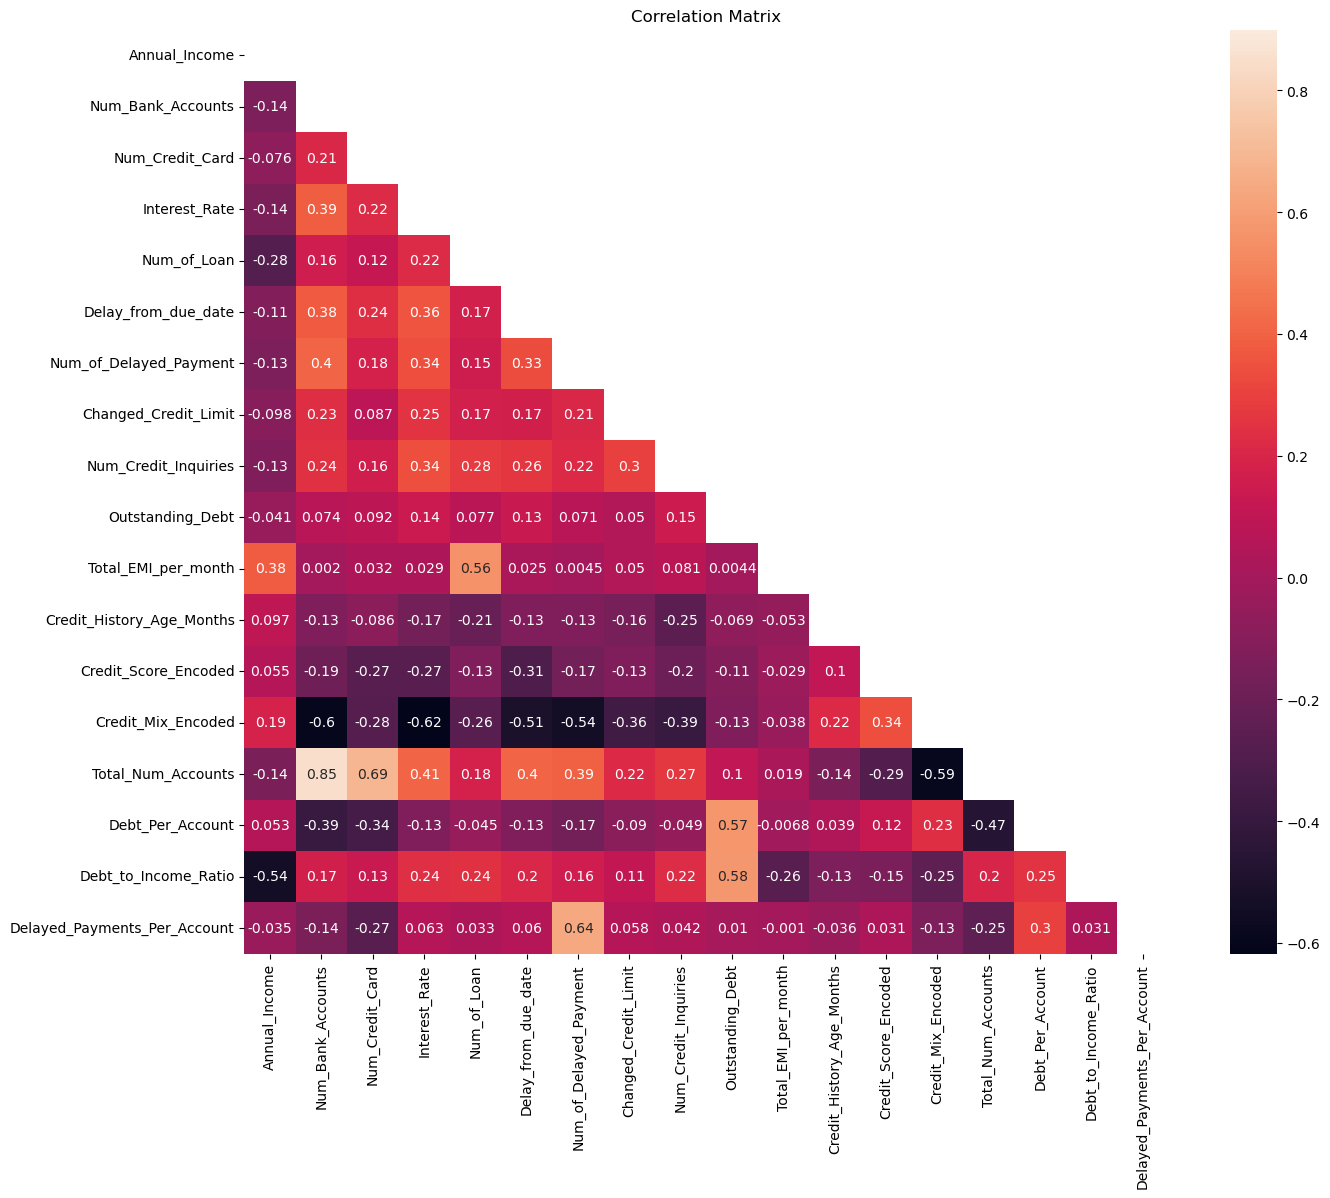

In [48]:
# Calculate Correlation Matrix

corr = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Financial Stability Indicators: Features such as 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', and 'Total_Num_Accounts' demonstrate positive correlations with each other and with the Credit score. This suggests that individuals with higher annual incomes or more diverse banking and credit card accounts tend to have higher credit scores.

    Debt-related Metrics: 'Debt_to_Income_Ratio' and 'Debt_Per_Account' exhibit negative correlations with the Credit score. This indicates that individuals with higher debt-to-income ratios or greater debt per account tend to have lower credit scores. Furthermore, 'Outstanding_Debt' demonstrates a weaker negative correlation with the credit score, highlighting its impact on overall creditworthiness.

    Credit Utilization and History: 'Total_EMI_per_month', representing monthly loan repayments, shows a positive correlation with the Credit score. Additionally, features related to credit history, such as 'Credit_History_Age_Months' and 'Credit_Mix_Encoded", suggests that individuals with longer credit histories, diverse credit accounts, and timely repayments tend to have higher credit scores.

    Loan-related Factors: Features like 'Num_of_Loan' and 'Num_of_Delayed_Payment' indicate an individual's borrowing behavior and repayment patterns. This implies that individuals with fewer loan accounts or instances of delayed payments are more likely to have higher Credit scores.

    Interest Rate and Financial Behavior: 'Interest_Rate' reveals a relationship with the Credit score, suggesting that individuals with lower Interest rates on their loans may have higher Credit scores. Moreover, 'Changed_Credit_Limit' and 'Num_Credit_Inquiries' also exhibit correlations, reflecting changes in credit limits and the frequency of credit inquiries, respectively.
    
    ______________________________________________________________________

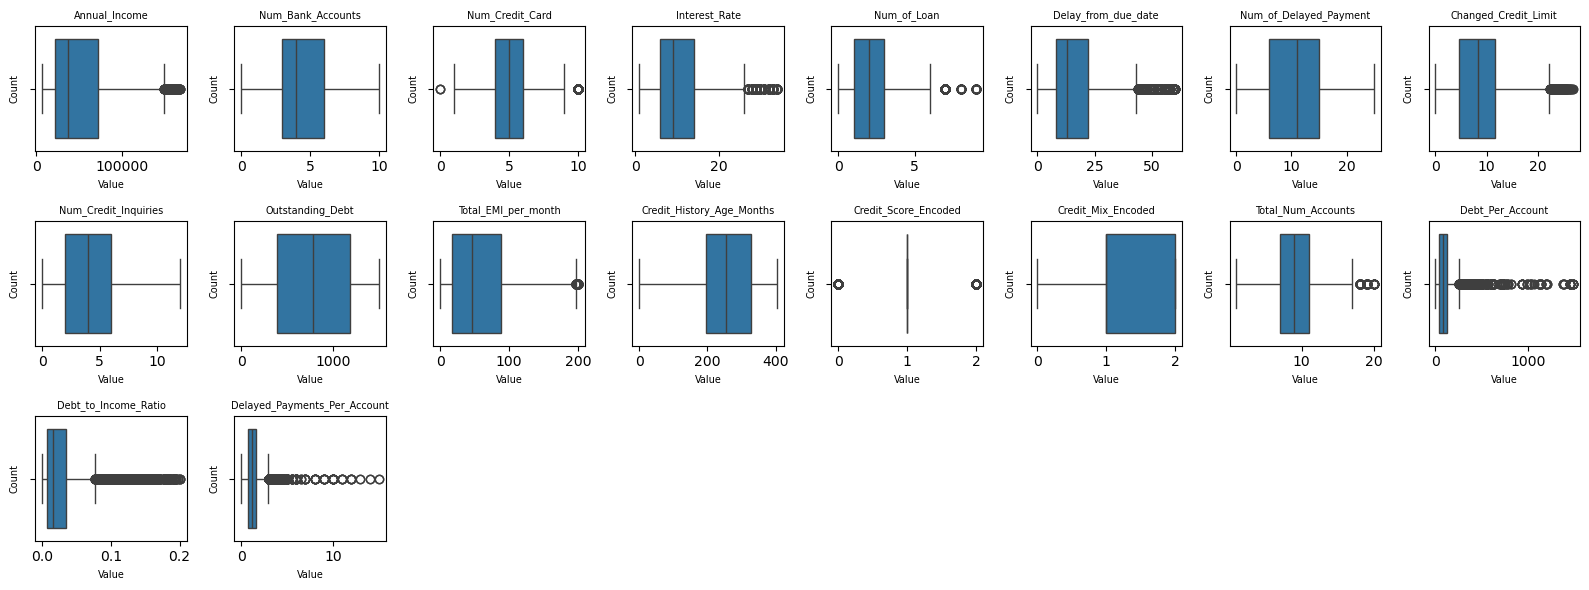

In [49]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

    KEY 🗝️  
    ______________________________________________________________________
    
    Let's not Scale New Features. Farther cut only produces more errors and damage accuracy (I've leraned it the hard way...)
    ______________________________________________________________________

## 6. 🧩 Model
<a id="model"></a>


### 6.0.1 🏗️ Buildind a Model
<a id="building-model"></a>


In [60]:
train.to_csv("trained_cleaned.csv", index=False)

In [50]:
y = train['Credit_Score_Encoded']

X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts', 
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

## 6.1 🧜‍♀️ MSE Model Fashion Show
<a id="mse-models"></a>

## 6.1.1 🌲 RandomForestRegressor
<a id="randomforestregressor"></a>


In [51]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

### 6.1.1.1 ✨ Model Validation (MSE)
<a id="validation"></a>

In [52]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1621489922101923


<a id="baseline-vs-mse"></a>
## 6.1.1.2 🎌 Baseline VS MSE

In [53]:
baseline_prediction = y_train.mean()  
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))

print("Baseline MSE:", baseline_mse)
print("MSE RFRegressor", mse)

Baseline MSE: 0.3749730269198414
MSE RFRegressor 0.1621489922101923


## 6.1.1.3 📏 Underfitting and Overfitting
<a id="underfitting-and-overfitting"></a>


    KEY 🗝️
    ______________________________________________________________________
    
    I used it in the process. After some Featuring I've realized that this part is not necessary. However, I will keep it here if you want to try it yourself

    Define the values of max_leaf_nodes for best model. 
    
    ______________________________________________________________________

In [54]:
# max_leaf_nodes_values = [1000, 3500, 5000]

# Dictionary to store the mean squared errors for each value of max_leaf_nodes
# mse_results = {}

# for max_leaf_nodes in max_leaf_nodes_values:
#    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=77)
    
#    model.fit(X_train, y_train)
    
#    y_pred = model.predict(X_test)
    
#    mse = mean_squared_error(y_test, y_pred)
#    mse_results[max_leaf_nodes] = mse

# for max_leaf_nodes, mse in mse_results.items():
#    print(f"max_leaf_nodes={max_leaf_nodes}: Mean Squared Error = {mse}")

<a id="xgboost"></a>
## 6.1.2 🚀 XGBoost

In [55]:
xgb_model = XGBRegressor(n_estimators=3500, learning_rate=0.05, random_state=77)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.162767004196021


<a id="comparing-mse"></a>
## 6.1.3 📉 Comparing MSE 

In [56]:
mse_rf = mean_squared_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

models = ['RandomForestRegressor', 'XGBoost']
mse_values = [mse_rf, mse_xgb]
colors = ['blue', 'green']

fig = go.Figure(data=[go.Bar(x=models, y=mse_values, marker_color=colors)])
fig.update_layout(
    title='Comparison of MSE between RandomForestRegressor and XGBoost',
    xaxis_title='Models',
    yaxis_title='Mean Squared Error (MSE)'
)
fig.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Both models show the same MSE rate 🏆
    ______________________________________________________________________

<a id="smote"></a>
## 6.2.1 🔄 SMOTE vs 🌳 ForestClassifier 

In [57]:
smote_params = {
    'sampling_strategy': 'auto',  
    'random_state': 77,           
    'k_neighbors': 5,             
    'n_jobs': -1                  
}

smote = SMOTE(**smote_params)

X_train = train.drop('Credit_Score_Encoded', axis=1) 
y_train = train['Credit_Score_Encoded']

X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.15, random_state=77)

rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)

rf_classifier.fit(X_train_smote, y_train_smote)

print("Accuracy on training set:", rf_classifier.score(X_train_smote, y_train_smote))

y_pred_smote = rf_classifier.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)

print("Accuracy on SMOTE test set:", accuracy_smote)

Accuracy on training set: 0.9995520990268333
Accuracy on SMOTE test set: 0.8945546838947854


## 6.2.2 🎖️ Accuracy test
<a id="accuracy-test"></a>

Accuracy on original test set: 0.9692457105859501

Classification report for SMOTE test set:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2919
         1.0       0.88      0.84      0.86      2871
         2.0       0.89      0.92      0.90      2878

    accuracy                           0.89      8668
   macro avg       0.89      0.89      0.89      8668
weighted avg       0.89      0.89      0.89      8668


Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       901
         1.0       0.98      0.97      0.97      3810
         2.0       0.95      0.98      0.96      1467

    accuracy                           0.97      6178
   macro avg       0.96      0.97      0.96      6178
weighted avg       0.97      0.97      0.97      6178



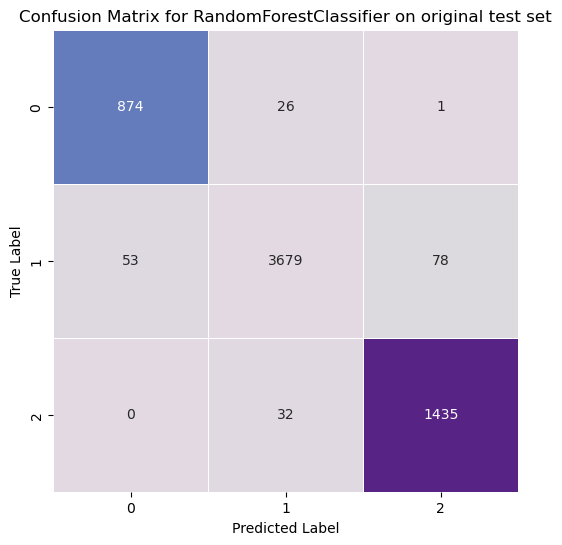

In [58]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for SMOTE test set:\n', classification_report(y_test_smote, y_pred_smote))
print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))

    KEY 🗝️
    ______________________________________________________________________
    
    The RandomForestClassifier trained on the original test set achieves a high accuracy of approximately 97% 🥇     
    This indicates that the model performs exceptionally well in classifying the target variable 🤌  
    The RandomForestClassifier trained on the SMOTE test set achieves a slightly lower accuracy of around 90%  🥈
    Despite the lower accuracy compared to the original test set, the SMOTE model still demonstrates a respectable performance 💪
    
    ______________________________________________________________________

<a id="conclusion"></a>
## 7. ✅ Conclusion

## 7.1 🔐 KEY POINTS
<a id="KEY-POINTS"></a>

    KEY POINTS:

    
    Financial Stability Indicators: 
        Features such as 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', and 'Total_Num_Accounts' demonstrate positive correlations with each other and with the Credit score. This suggests that individuals with higher annual incomes or more diverse banking and credit card accounts tend to have higher credit scores.

    Debt-related Metrics: 
        'Debt_to_Income_Ratio' and 'Debt_Per_Account' exhibit negative correlations with the Credit score. This indicates that individuals with higher debt-to-income ratios or greater debt per account tend to have lower credit scores. Furthermore, 'Outstanding_Debt' demonstrates a weaker negative correlation with the credit score, highlighting its impact on overall creditworthiness.

    Credit Utilization and History: 
        'Total_EMI_per_month', representing monthly loan repayments, shows a positive correlation with the Credit score. Additionally, features related to credit history, such as 'Credit_History_Age_Months' and 'Credit_Mix_Encoded", suggests that individuals with longer credit histories, diverse credit accounts, and timely repayments tend to have higher credit scores.

    Loan-related Factors: 
        Features like 'Num_of_Loan' and 'Num_of_Delayed_Payment' indicate an individual's borrowing behavior and repayment patterns. This implies that individuals with fewer loan accounts or instances of delayed payments are more likely to have higher Credit scores.

    Interest Rate and Financial Behavior: 
        'Interest_Rate' reveals a relationship with the Credit score, suggesting that individuals with lower Interest rates on their loans may have higher Credit scores. Moreover, 'Changed_Credit_Limit' and 'Num_Credit_Inquiries' also exhibit correlations, reflecting changes in credit limits and the frequency of credit inquiries, respectively.

## 7.2 ☝️ TIPS
<a id="tips"></a>


        Here are some tips to help you maintain a good credit score ✅:
  


    Pay Your Bills on Time ⌚:
    
        Your payment history is one of the most significant factors in determining your credit score. Make sure to pay all your bills, including credit cards, loans, and utilities, on time to avoid late payments.
        
        
    Keep Your Credit Card Balances Low 🪙: 
    
        Try to keep your credit card balances low relative to your credit limit. High credit utilization ratios can negatively impact your credit score, so aim to keep your balances below 30% of your credit limit.


    Limit New Credit Applications 💳: 
    
        Every time you apply for new credit, a hard inquiry is recorded on your credit report, which can temporarily lower your score. Be selective about applying for new credit and only apply when necessary.
       
        
    Maintain a Mix of Credit Types 💹: 
    
        Having a diverse mix of credit types, such as credit cards, loans, and mortgages, can positively impact your credit score. However, don't open accounts you don't need just to improve your credit mix.


    Avoid Closing Old Accounts 💰: 
    
        Length of credit history is also a factor in your credit score. Closing old accounts can shorten your average account age and potentially lower your score. Keep your oldest accounts open and active, even if you're not using them regularly.

## 7.3 ✍️ Personal Experience on Credit Score
<a id="pexperience"></a>

        What is your Credit Score?   
    
      
    I would like to know your opinion on what else affecting Credit Score. Maybe it's somethings, which is not mentioned in variables. 
    Well, I never had a Credit Debt untill I became a Digital Nomad and bought a flight on the other edge of the planet. Many things happened aside my journey and without credit card I would not have made it for sure.
    Credits and loans can be useful if we invest it in something, that will benefit us in future, like house, study, work laptop or car. Be aware, that debts spent on pleasures will, eventually, lead to missery. I tell it out of very tragic experience encounted in people I knew...   
      
      
    I think, it is even more important to know how to manage your finances, rather than your Credit Score (It also valuable, when you will need a loan or mortrage. It will make a difference for sure). 
    Learn how to use money, after it you will not be afraid of taking a loan.   
    
    
        Read:  
      
    "Rich Dad, Poor Dad" by Robert Kiyosaki. 
    
    Also, "The reachest man in Babylon" by Samuel Clason.
    
    And cherry on the top is "The Science of Getting Rich" by Wallace D. Wattles. 
    

        Warriors! I wish all of you wealth and health!

## 7.4 🛞 Evaluations on building Data Models
<a id="building-DM"></a>

    That's more for Novices, actually. I mostly learned all of the above from Kaggle Learn Section and did each phase Step by Step. 
    I can do it, you can do it too! Thanks greatly for creators of Educational block ❤️
    
    - I advice for learners not to be ignorant in Cleaning Process;
    - To be curious on Features block and try different approach;
    - To get rid of temptation to analyse metrics and variables you don't need and which are not relatable for modeling;
    - Stick to basics, do not try to overdo it. Most of my time I spent on applying parameters and models, which were showing the same perfomance.
    - Have some passion, bring some lightness and playfulness in your work. Try to be curious about for the heck you making project about. Use this knowledge in real life. 
    - Use "Pomodoro technique' in your responsobility tasks fractures and "Kaizen" mentality to improve every time you do project. 
    - If you do mediocre, you will recieve mediocre. You will have mediocre chances to get hired, promoted, succesfull. 
    - Have faith and good luck!

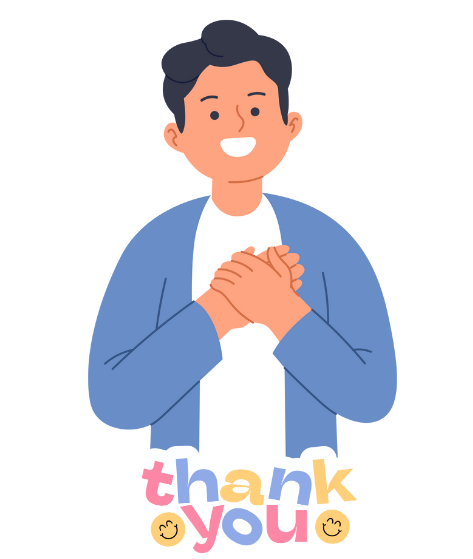